# 실습 환경설정

In [1]:
# 학번, 이름 화면에 출력
id = '20197132'
name = '주준하'
print(id, name)

20197132 주준하


In [2]:
# 구글 드라이브 사용 권한 설정
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
# 과제 파일 저장한 폴더 위치 설정 (폴더 위치에 맞춰서 변경할 것)
import os
colab_path = "/gdrive/My Drive/Colab Notebooks/CV_과제3"  # 경로예시: 구글드라이브/내 드라이브/Colab Notebooks/과제폴더명

# OpenCV 실습내용

## 색공간

In [5]:
# OpenCV 패키지 사용
# !pip install opencv-python
import cv2
from google.colab.patches import cv2_imshow  # colab 용 cv2.imshow
import matplotlib.pyplot as plt  # 시각화 도구

In [6]:
img = cv2.imread(os.path.join(colab_path, 'elon-musk.png'), cv2.IMREAD_COLOR)  # 기본 BGR 채널로 이미지 읽기

In [7]:
img.shape  # numpy ndarray: (행, 열, 채널)

(630, 1200, 3)

In [8]:
img.size  # 행 * 열 * 채널

2268000

In [9]:
img.dtype  # uint8: 정수형 [0, 255]

dtype('uint8')

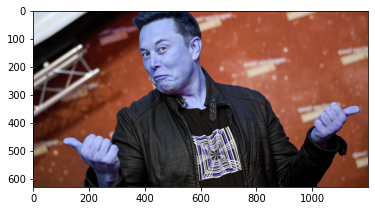

In [10]:
plt.imshow(img)  # OpenCV 기본 컬러순서: B, G, R

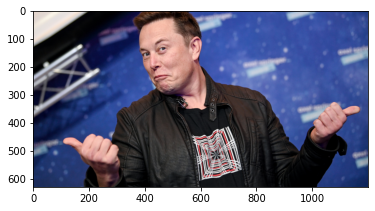

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 색공간변환: BGR -> RGB
#img_rgb = img[:, :, [2, 1, 0]]  # BGR -> RGB
# cv2_imshow(img_rgb)
plt.imshow(img_rgb)

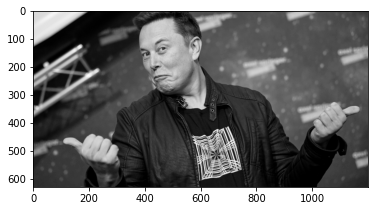

In [12]:
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)  # 색공간변환: BGR -> YCrCb
img_y = img_ycrcb[:, :, 0]  # Y 채널 추출
plt.imshow(img_y, cmap='gray')  # grayscale로 plot

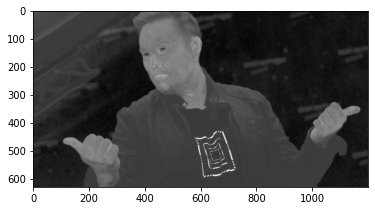

In [15]:
img_cr = img_ycrcb[:, :, 1]  # Cr 채널 추출
plt.imshow(img_cr, cmap='gray')  # grayscale로 plot

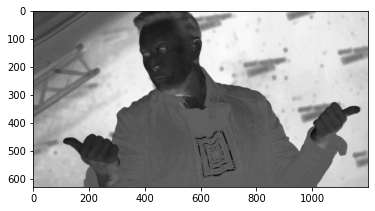

In [16]:
img_cb = img_ycrcb[:, :, 2]  # Cb 채널 추출
plt.imshow(img_cb, cmap='gray')  # grayscale로 plot

In [17]:
img_gray = cv2.imread(os.path.join(colab_path, 'baboon.png'), cv2.IMREAD_GRAYSCALE)  # grayscale로 파일 읽기

In [18]:
img_gray.shape  # grayscale 1채널

(512, 512)

In [19]:
img_gray.size  # 행 * 열 * 채널

262144

In [20]:
img_gray.dtype  # uint8: 정수형 [0, 255]

dtype('uint8')

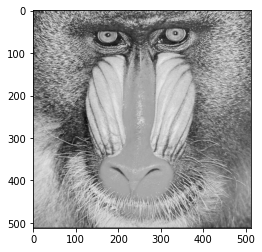

In [22]:
plt.imshow(img_gray, cmap='gray')

## 이미지 읽기, 쓰기

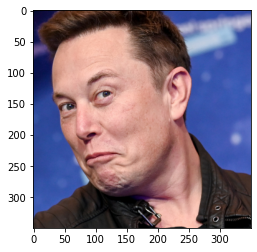

In [21]:
img_rgb_crop = img_rgb[:350, 350:700, :]  # 얼굴 절삭
plt.imshow(img_rgb_crop)

In [23]:
cv2.imwrite(os.path.join(colab_path, 'elon-face.png'), img_rgb_crop)  # png 파일 저장

True

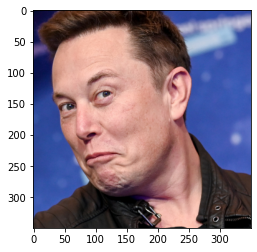

In [24]:
img_sample = cv2.imread(os.path.join(colab_path, 'elon-face.png'), cv2.IMREAD_COLOR)  # png 파일 읽기
plt.imshow(img_sample)

In [25]:
cv2.imwrite(os.path.join(colab_path, 'elon-face.jpg'), img_rgb_crop)  # jpg 파일 저장

True

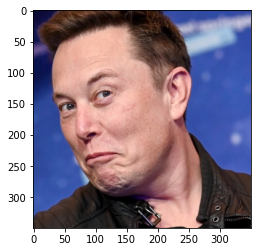

In [26]:
img_sample = cv2.imread(os.path.join(colab_path, 'elon-face.jpg'), cv2.IMREAD_COLOR)  # jpg 파일 읽기
plt.imshow(img_sample)

## 영상처리

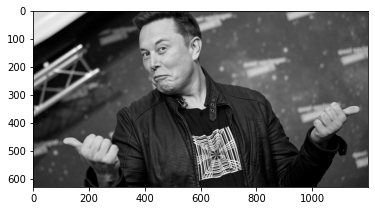

In [29]:
import numpy as np

img = cv2.imread(os.path.join(colab_path, "elon-musk.png"), cv2.IMREAD_COLOR)
kernel = np.ones((5, 5), np.uint8)

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray, cmap='gray')  # grayscale로 plot

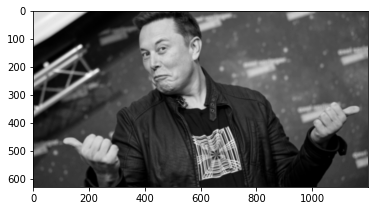

In [30]:
# GaussianBlur: 흐림 효과
imgBlur = cv2.GaussianBlur(imgGray, (7,7), 0)
plt.imshow(imgBlur, cmap='gray')

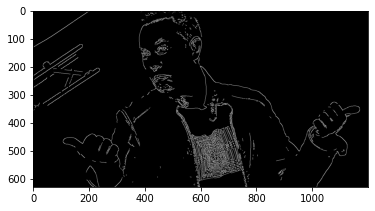

In [31]:
# Canny Edge Detection: 경계선 추출
imgCanny = cv2.Canny(imgGray, 150, 200)
plt.imshow(imgCanny, cmap='gray')

In [32]:
# 이미지 크기변화
img = cv2.imread(os.path.join(colab_path, "elon-musk.png"), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)

imgResize = cv2.resize(img_rgb, (800, 400))  # (열, 행)
print(imgResize.shape)

(630, 1200, 3)
(400, 800, 3)


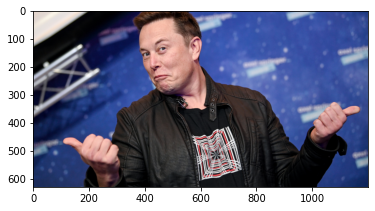

In [33]:
plt.imshow(img_rgb)  # 원본 영상 plot

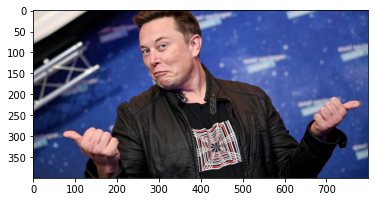

In [34]:
plt.imshow(imgResize)  # 크기변화한 영상 plot

## 얼굴 탐지

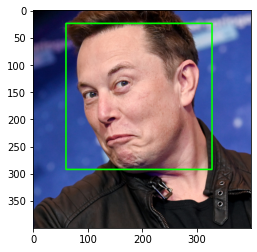

In [46]:
faceCascade= cv2.CascadeClassifier(os.path.join(colab_path, "haarcascade_frontalface_default.xml"))
img = cv2.imread(os.path.join(colab_path, 'elon-musk.png'))
img = img[:400, 300:700]
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(img_gray, 1.1, 4)

for (x,y,w,h) in faces:
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(img_rgb)

## 차량 번호판 탐지

In [36]:
frameWidth = 640
frameHeight = 480
nPlateCascade = cv2.CascadeClassifier(os.path.join(colab_path, "haarcascade_russian_plate_number.xml"))
minArea = 200
color = (0,255,0)
img_list = ['p1.jpg', 'p2.jpg', 'p3.jpg']
count = 0

for curr_img in img_list:
    img = cv2.imread(os.path.join(colab_path, curr_img), cv2.IMREAD_COLOR)
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    numberPlates = nPlateCascade.detectMultiScale(imgGray, 1.1, 10)
    for (x, y, w, h) in numberPlates:
        area = w*h
        if area > minArea:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)
            cv2.putText(img,"Number Plate",(x,y-5),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL,1,color,2)
            imgRoi = img[y:y+h,x:x+w]
            cv2_imshow(imgRoi)

    cv2_imshow(img)  # Colab용 cv2.imshow함수(BGR -> RGB 변환 포함)

    if cv2.waitKey(1) & 0xFF == ord('s'):
        cv2.rectangle(img,(0,200),(640,300),(0,255,0),cv2.FILLED)
        cv2.putText(img,"Scan Saved",(150,265),cv2.FONT_HERSHEY_DUPLEX,
                    2,(0,0,255),2)
        cv2_imshow(img)
        cv2.waitKey(500)

Output hidden; open in https://colab.research.google.com to view.

## 참고자료: OpenCV Haar/cascade training 튜토리얼

https://darkpgmr.tistory.com/70

# 실습 과제

문제: many_faces.jpg 파일의 모든 얼굴을 탐지하여 plot하기
- 사람 얼굴을 red box로 표시하기
- 얼굴 탐지 코드 활용하기
- 모든 사람의 얼굴에 red box는 1개만 표시하기

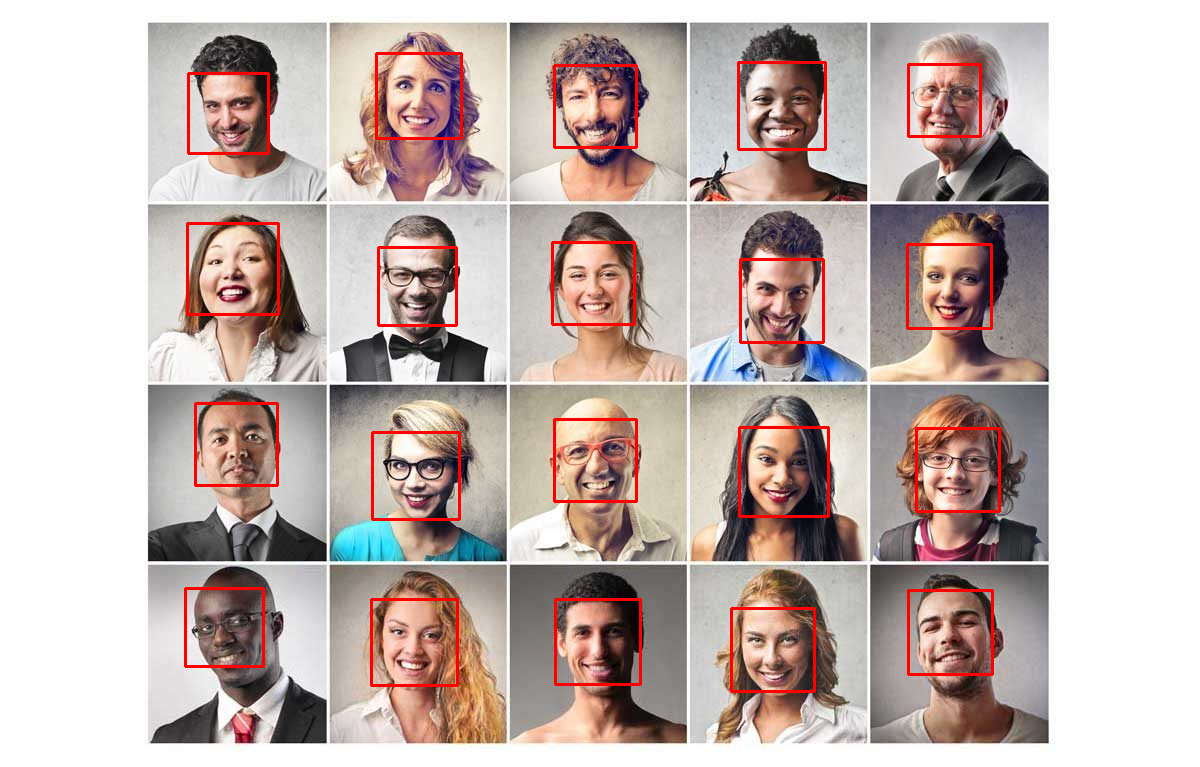

In [80]:
# 실습과제 코드 작성 부분
faceCascade= cv2.CascadeClassifier(os.path.join(colab_path, "haarcascade_frontalface_default.xml"))
img = cv2.imread(os.path.join(colab_path, 'many_faces.jpg'))

faces = faceCascade.detectMultiScale(img_gray, 1.1, 4)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0, 0, 255), 2)
cv2_imshow(img)